## Proceso de Poisson homogéneo y algoritmo de simulación

Consideramos un **proceso de Poisson homogéneo** \( \{N(t)\}_{t \ge 0} \) con tasa constante \( \lambda > 0 \).

Intuitivamente:
- \(N(t)\) cuenta cuántos eventos han ocurrido hasta el tiempo \(t\).
- Los incrementos son independientes y estacionarios:
  \[
  N(t+h) - N(t) \sim \text{Poisson}(\lambda h).
  \]
- Los **tiempos entre llegadas** son independientes e idénticamente distribuidos:
  \[
  S_1, S_2, \dots \sim \text{Exp}(\lambda),
  \]
  donde \(S_k\) es el tiempo entre la llegada \(k-1\) y la llegada \(k\).

Si definimos los **tiempos de llegada** como
\[
T_1 = S_1, \quad
T_2 = S_1 + S_2, \quad
T_3 = S_1 + S_2 + S_3, \dots
\]
entonces \( N(t) \) es simplemente el número de \( T_k \) que son menores o iguales que \( t \).

---

### Objetivo

Queremos simular los tiempos de llegada del proceso de Poisson homogéneo en el intervalo \([0, T]\), para algún tiempo final \(T > 0\).

---

### Idea del algoritmo

Usamos la propiedad clave:

> Los tiempos entre llegadas \(S_k\) son variables **Exponenciales(\(\lambda\))** independientes.

Entonces:

1. Empezamos en el **tiempo actual** \( t = 0 \).
2. Generamos un tiempo de espera \( S_1 \sim \text{Exp}(\lambda) \).
3. Avanzamos el reloj: \( t \leftarrow t + S_1 \).  
   - Si \( t \le T \), entonces registramos una llegada en el tiempo \( t \).
   - Si \( t > T \), nos salimos del intervalo \([0, T]\) y terminamos.
4. Repetimos:
   - Generamos otro \( S_2 \sim \text{Exp}(\lambda) \),
   - actualizamos \( t \leftarrow t + S_2 \),
   - comprobamos si \( t \le T \), etc.
5. Paramos cuando el siguiente tiempo de llegada se pasa de \(T\).

Al final, obtenemos una lista ordenada de tiempos de llegada:
\[
0 < T_1 < T_2 < \dots < T_n \le T,
\]
y el proceso de conteo se define como:
\[
N(t) = \#\{k : T_k \le t\}.
\]

---

### Pseudocódigo del algoritmo

Supongamos que tenemos una función `Exp(lambda)` que devuelve una muestra exponencial con parámetro \(\lambda\).

```text
Entrada: tasa λ > 0, horizonte T > 0
Salida: lista de tiempos de llegada [T1, T2, ..., Tn] en [0, T]

1. t ← 0                  # tiempo actual
2. arrival_times ← [ ]    # lista vacía de tiempos de llegada

3. Mientras True:
       a) Generar S ~ Exp(λ)      # tiempo entre llegadas
       b) t ← t + S               # avanzar el reloj
       c) Si t > T:
              salir del bucle
          Si no:
              añadir t a arrival_times

4. Devolver arrival_times


In [ ]:
import os
import sys

def find_repo_root(marker="src"):
    """
    Sube directorios hacia arriba hasta encontrar uno que contenga
    una carpeta llamada `marker` (por defecto 'src').
    """
    cwd = os.getcwd()
    while True:
        if marker in os.listdir(cwd):
            return cwd
        parent = os.path.dirname(cwd)
        if parent == cwd:  # hemos llegado a la raíz del sistema
            return None
        cwd = parent

repo_root = find_repo_root("src")
print("Directorio actual:", os.getcwd())
print("Raíz del repo detectada:", repo_root)

if repo_root is None:
    raise RuntimeError("No encontré una carpeta 'src' en los directorios superiores")

# Añadimos la raíz del repo al sys.path
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

print("Primeros elementos de sys.path:")
for p in sys.path[:5]:
    print("  ", p)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from src.poisson.homogeneo import simulate_poisson_homogeneous


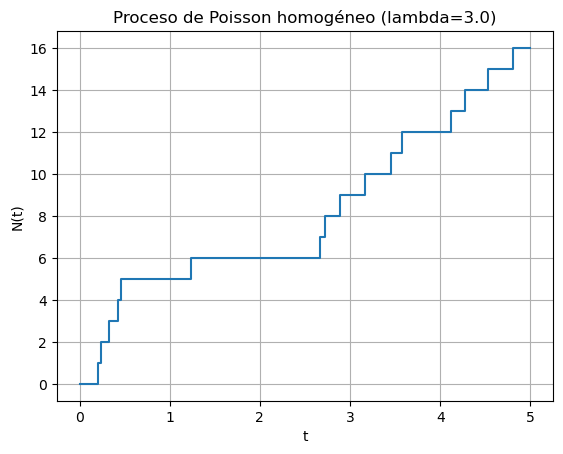

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from src.poisson.homogeneo import simulate_poisson_homogeneous

lam = 3.0   # tasa
T = 5.0     # horizonte
rng = np.random.default_rng(seed=123)

arrival_times = simulate_poisson_homogeneous(lam, T, rng=rng)

# Construimos N(t) como proceso escalonado
# Insertamos t=0 con N=0
t_vals = np.concatenate(([0.0], np.repeat(arrival_times, 2), [T]))
# En cada llegada, N(t) sube en 1
n_events = np.arange(len(arrival_times) + 1)
N_vals = np.repeat(n_events, 2)

# Ajustamos el último tramo hasta T
t_vals[-1] = T

plt.step(t_vals, N_vals, where="post")
plt.xlabel("t")
plt.ylabel("N(t)")
plt.title(f"Proceso de Poisson homogéneo (lambda={lam})")
plt.grid(True)
plt.show()
